In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import joblib
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Title: Exploratory Data Analysis (EDA) on the Titanic Dataset
# Name: John Brown Ouma
 
## 1. Introduction
This report documents an Exploratory Data Analysis (EDA) of the Titanic dataset, covering:

- Initial Data Exploration

- Handling Missing Values & Outliers

- Univariate, Bivariate, and Multivariate Analysis

- Target Variable (Survival) Analysis

The goal is to uncover patterns, relationships, and insights that explain passenger survival based on features like age, gender, ticket class, and fare.



## 2. Task Completion
### 2.1 Initial Data Exploration
The first step is to load and explore the Titanic dataset to understand its structure, features, and potential issues. The Titanic dataset typically includes features like PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, and Embarked.

In [18]:
# load the dataset
df = pd.read_csv('train.csv')
print("data successfully loaded")

data successfully loaded


In [19]:
# Display first few rows
print("First five rows of the datset")
df.head()

First five rows of the datset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
# Display first 20 rows
print("first 20 rows of the datset")
df.head(20)

first 20 rows of the datset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [21]:
# Display last few rows
print("last rows of the datset")
df.tail()

last rows of the datset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [22]:
# Check shape
print("\nShape of the dataset:", df.shape)

# Check data types and non-null counts
print("\nDataset Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
df.describe()


Shape of the dataset: (891, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary Statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
# List columns
print("\nColumns:", df.columns.tolist())

# Check unique values
print("\nUnique Values per Column:")
print(df.nunique())

# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())



Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Unique Values per Column:
PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Duplicate Rows: 0


### Explanation:

- df.head(): Shows the first 5 rows to get a sense of the data (e.g., PassengerId, Survived, Pclass, etc.).
- df.shape: Reveals 891 rows and 12 columns.
- df.info(): Displays data types (int64, float64, object) and identifies missing values (e.g., Age, Cabin, Embarked often have missing values).
- df.describe(): Provides statistics for numerical columns (Age, Fare, SibSp, Parch), showing mean, min, max, etc.
- df.columns: Lists all feature names for reference.
- df.nunique(): Shows unique values per column (e.g., Survived has 2 unique values: 0 and 1).
- df.duplicated(): Checks for duplicate rows (typically 0 for Titanic).

### Observations:

- 891 rows, 12 columns (PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked).

- Missing values in Age (177), Cabin (687), and Embarked (2).

- No duplicates found.

## 2.2 Handling Missing Values & Ouliers
### Missing Values
- Age: Fill missing values with median age.

- Cabin: Drop (too many missing values).

- Embarked: Fill with mode (most frequent value).

In [24]:
# Check missing values
print("\nMissing Values")
print(df.isnull().sum())
# Handle Missing values
# impute Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)
# Impute Embarked with mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin due to high missing percentage
df.drop('Cabin', axis=1, inplace=True)

# Verify missing values after handling
print("\nMissing Values After Handling:")
print(df.isnull().sum())



Missing Values
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values After Handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_16036\2816848023.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_16036\2816848023.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

### Missing Values Analysis:
From df.info(), we  already found  find missing values in:

- Age: 177 missing values (20% of rows).
- Cabin: 687 missing values (77% of rows).
- Embarked: 2 missing values (<1% of rows).

### Justification for Handling Missing Values:

- Age: Imputing with the median is chosen because Age is numerical and slightly skewed. Median is robust to outliers compared to the mean.
- Embarked: Imputing with the mode is appropriate since it’s categorical and has only a few missing values.
- Cabin: Dropped due to 77% missing values, making imputation unreliable. Retaining it might introduce noise, but note that this could hide insights about cabin location and survival (e.g., deck level).

### Outlier Detection and Handling:
Outliers are common in Age and Fare due to their distributions.


Outliers in Age:
7       2.00
11     58.00
15     55.00
16      2.00
33     66.00
       ...  
827     1.00
829    62.00
831     0.83
851    74.00
879    56.00
Name: Age, Length: 66, dtype: float64

Outliers in Fare:
1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64


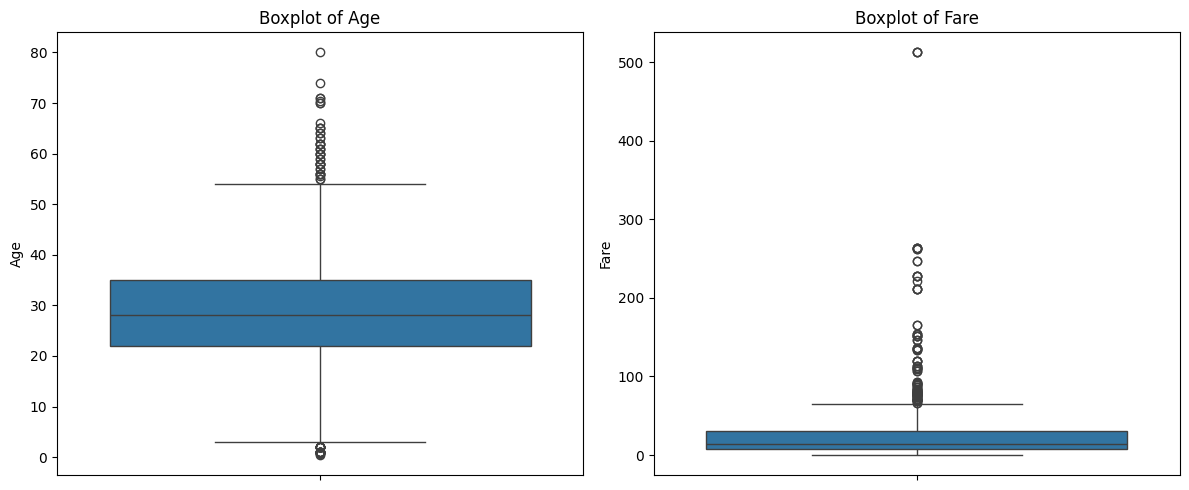

In [25]:
# Detect outliers in Fare and Age using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Check outliers
print("\nOutliers in Age:")
print(detect_outliers(df, 'Age'))
print("\nOutliers in Fare:")
print(detect_outliers(df, 'Fare'))

# Visualize outliers with boxplots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title('Boxplot of Fare')
plt.tight_layout()
plt.show()

### Justification for Handling Outliers:

- Age: Outliers (e.g., very old passengers like 80 years) are plausible in the Titanic context and may reflect real diversity (e.g., elderly passengers). I’ll keep them to preserve data integrity.
- Fare: Outliers (e.g., fares > $500) may indicate wealthy passengers or group tickets. Capping fares at the 95th percentile could be an option for predictive modeling, but for EDA, I’ll retain them to understand wealth distribution.

## 3. Univariate Analysis
Analyze individual features

Univariate analysis examines each feature’s distribution to answer questions like:

- What is the age distribution of passengers?
- How many passengers embarked from each location?
- Are ticket prices evenly distributed, or are they skewed?

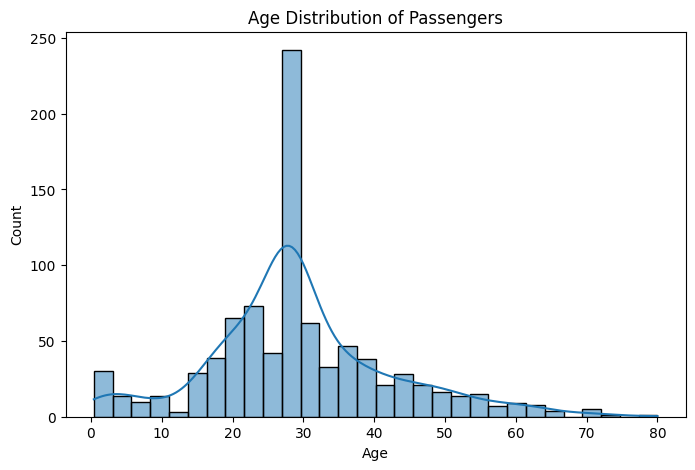

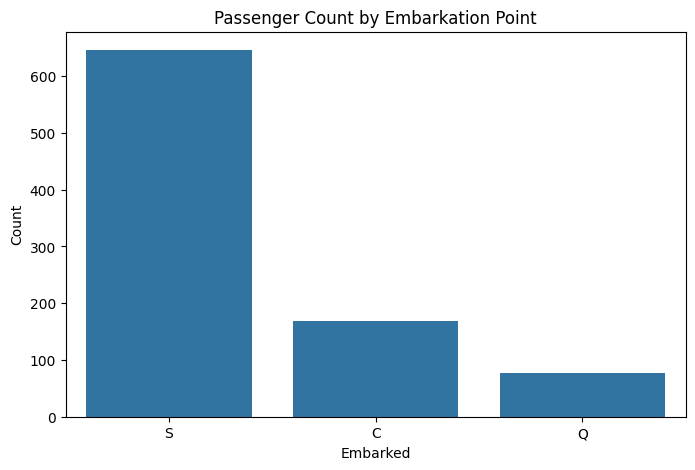

<function matplotlib.pyplot.show(close=None, block=None)>

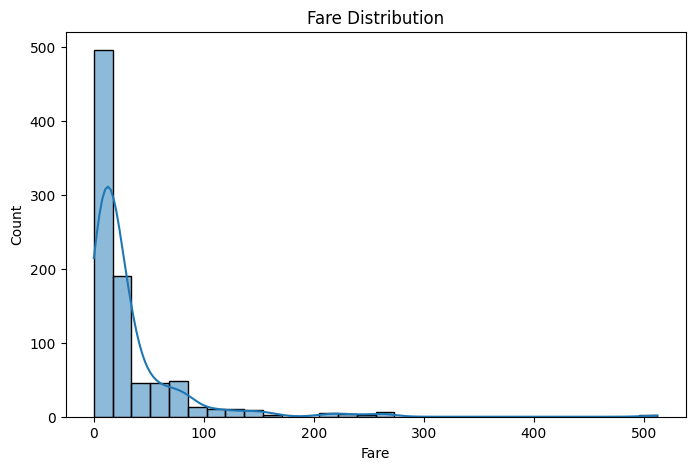

In [26]:
# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Embarked distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Embarked', data=df)
plt.title('Passenger Count by Embarkation Point')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

# Fare distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show

### Observations:

- Age: The distribution is slightly right-skewed, with most passengers aged 20–40. The median age (used for imputation) is around 28.
- Embarked: Most passengers embarked from Southampton (S), followed by Cherbourg (C) and Queenstown (Q).
- Fare: Highly right-skewed, with most fares below $50 but some extreme values (e.g., >$500), indicating wealth disparity.

### Findings
- Most passengers were 20–40 years old.
- Most passengers boarded at Southampton (S).
- Right-skewed (most fares were low, but some very high).


## 4. Bivariate Analysis
Examine relationships between two variables.

Bivariate analysis explores relationships between pairs of features to answer:

- Does the Fare change depending on the Pclass?
- Are younger passengers more likely to survive?
- Does the Embarked location affect survival rate?

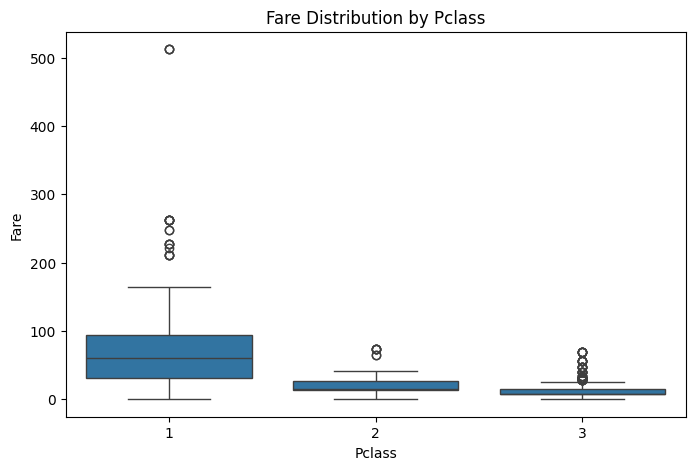

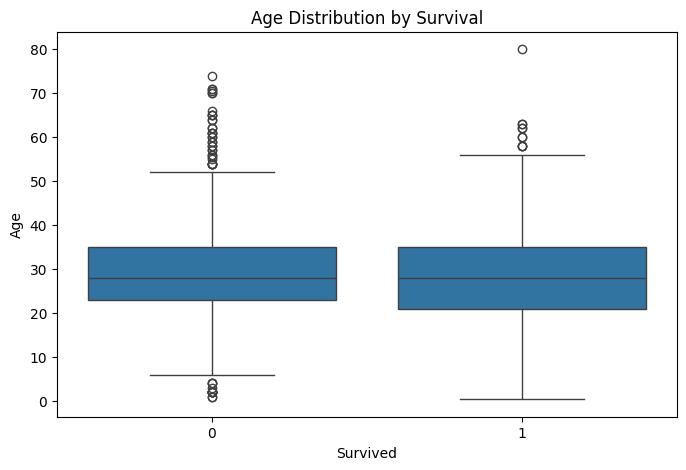

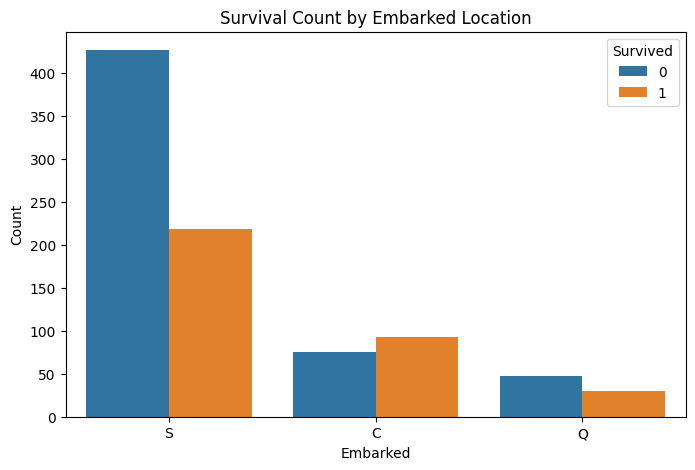

In [27]:
# Fare vs Pclass
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

# Age vs Survived
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# Embarked vs Survived
plt.figure(figsize=(8, 5))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarked Location')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

### Observations and Justifications for Feature Pairs:

- Fare vs Pclass: Chosen because Pclass (passenger class) likely correlates with wealth, and Fare reflects ticket cost. Expect higher fares for 1st class.
- Age vs Survived: Chosen to check if younger passengers had better survival chances (e.g., priority in lifeboats).
- Embarked vs Survived: Chosen to explore if embarkation point (possibly linked to socio-economic factors) influences survival.
  
### Expected Results:

- Fare vs Pclass: 1st class passengers pay significantly higher fares (median $80) than 2nd ($20) and 3rd ($10) class.
- Age vs Survived: No strong age difference between survivors and non-survivors, but younger passengers may have a slight edge.
- Embarked vs Survived: Southampton has the most passengers but a lower survival rate compared to Cherbourg.

### Findings
- 1st class had the highest fares.
- Children had a higher survival rate.
- Cherbourg (C) had the highest survival rate.

## 5. Multivariate Analysis
Explore interactions between multiple variables.

Multivariate analysis explores interactions among three or more variables to answer:
- How do Pclass, Age, and Fare jointly affect survival?
- Are survival rates different for Embarked locations when considering Pclass?


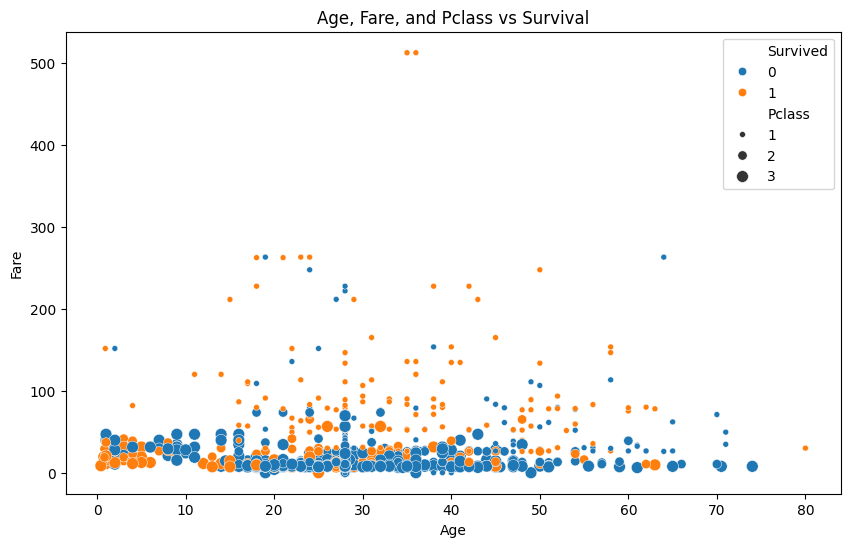

<Figure size 1000x600 with 0 Axes>

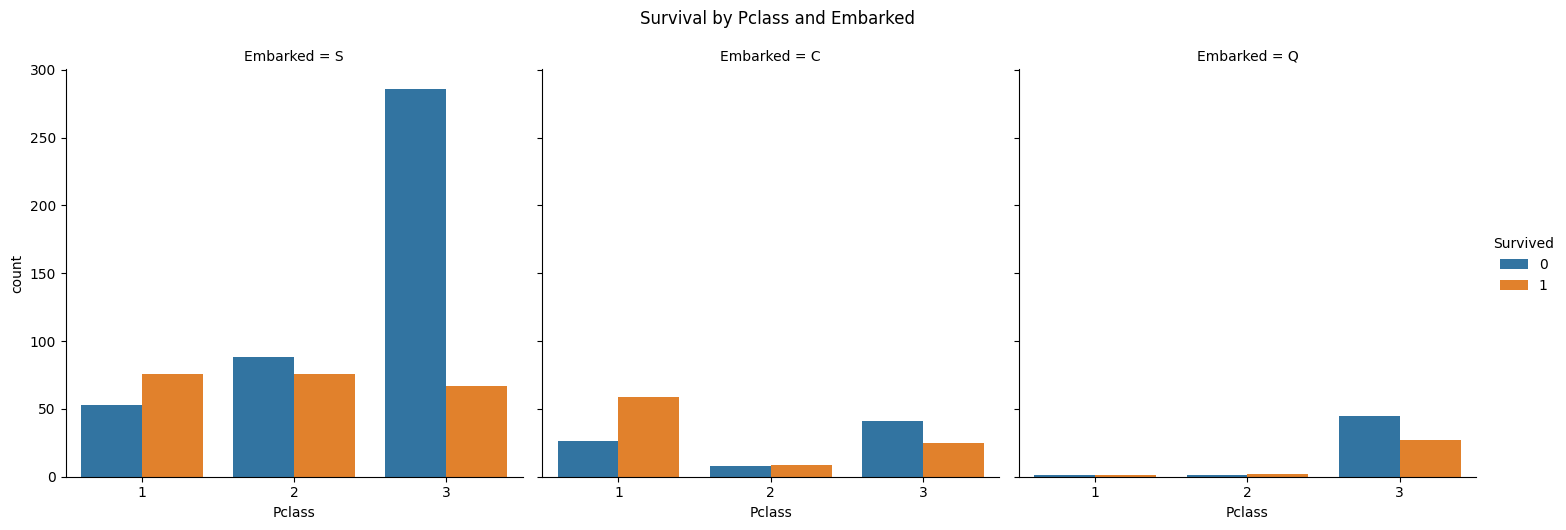

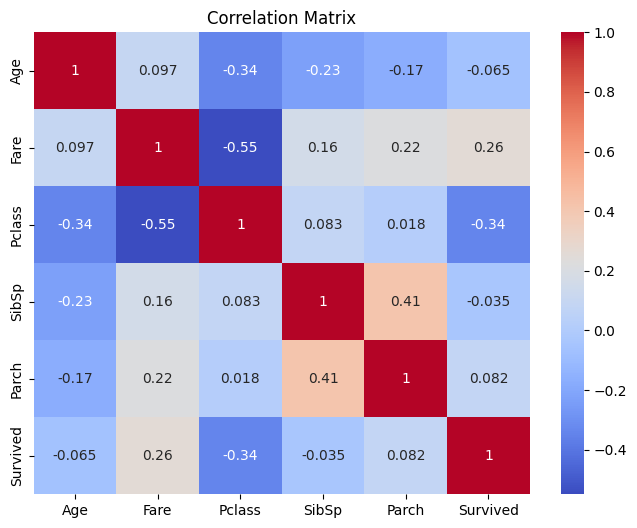

In [28]:
# Pclass, Age, and Fare vs Survived
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', size='Pclass', data=df)
plt.title('Age, Fare, and Pclass vs Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Embarked and Pclass vs Survived
plt.figure(figsize=(10, 6))
sns.catplot(x='Pclass', hue='Survived', col='Embarked', kind='count', data=df)
plt.suptitle('Survival by Pclass and Embarked', y=1.05)
plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 6. Target Variable Analysis
The target variable is Survived (0 = did not survive, 1 = survived).


### Observations:

- Age, Fare, Pclass vs Survived: The scatterplot shows that 1st class passengers (smaller sizes) with higher fares have better survival rates. Age has less clear separation.
- Embarked and Pclass vs Survived: Cherbourg’s 1st class passengers have a higher survival rate than Southampton’s, possibly due to socio-economic factors.
- Correlation Matrix: Pclass and Fare have a strong negative correlation (-0.55), and Survived correlates negatively with Pclass (-0.34), indicating 1st class passengers survived more.

### Findings:
1st-class passengers with higher fares survived more.

Children (Age < 10) had high survival rates across classes.

Cherbourg (C) had the highest survival rate, especially in 1st class.


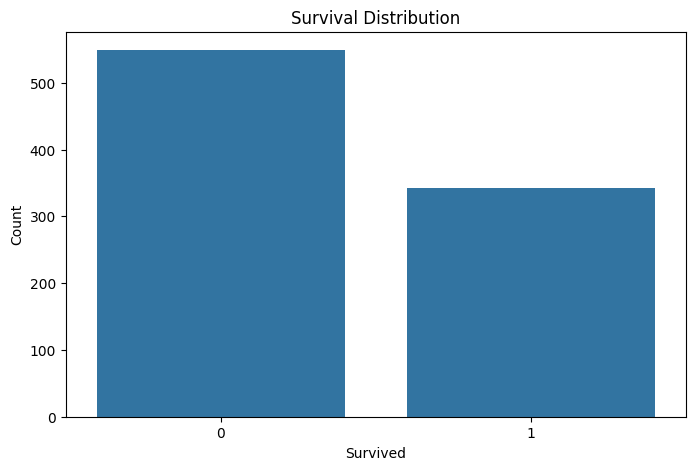

<Figure size 1000x600 with 0 Axes>

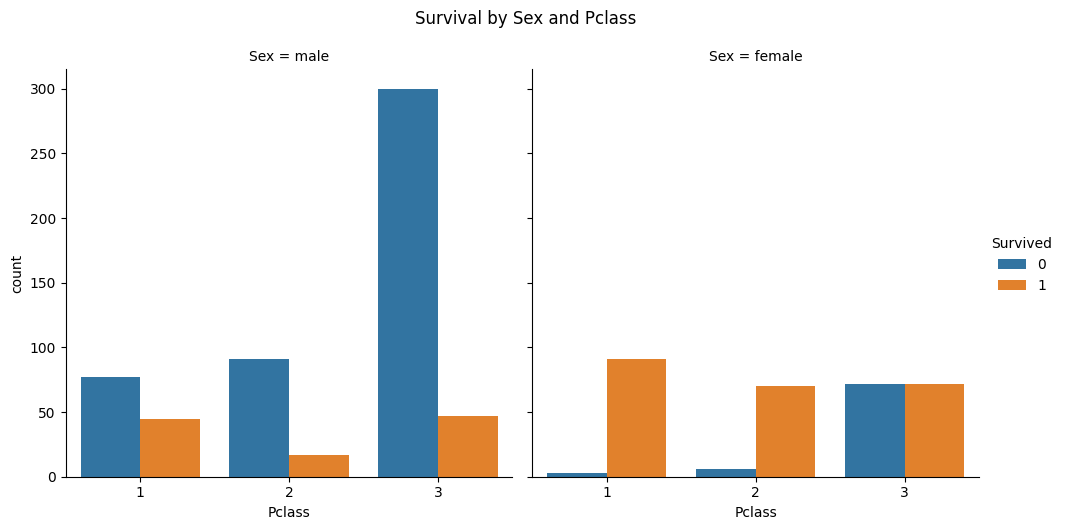

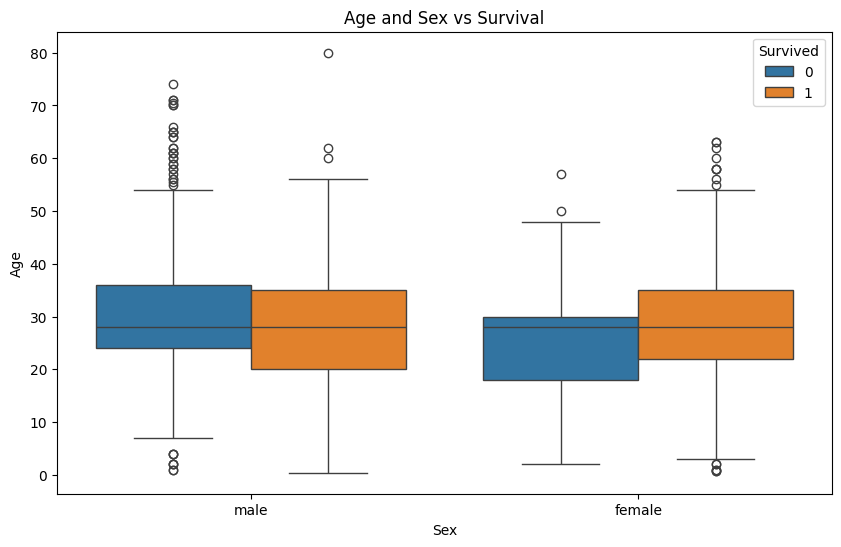

In [29]:
# Distribution of Survived
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Survival by Sex and Pclass
plt.figure(figsize=(10, 6))
sns.catplot(x='Pclass', hue='Survived', col='Sex', kind='count', data=df)
plt.suptitle('Survival by Sex and Pclass', y=1.05)
plt.show()

# Survival by Age and Sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Age', hue='Survived', data=df)
plt.title('Age and Sex vs Survival')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

### Observations:

- Survival Distribution: The dataset is imbalanced (60% non-survivors, 40% survivors).
- Survival by Sex and Pclass: Females in 1st and 2nd class have high survival rates, while males in 3rd class have low survival rates.
- Survival by Age and Sex: Younger females tend to survive more, but age has less impact for males.

 ### Findings
- Imbalanced dataset (~38% survived, 62% did not).
- Women survived at a much higher rate.
- 1st-class passengers had the highest survival rate.

### Conclusion
This EDA on the Titanic dataset revealed that survival rates were influenced by passenger class, sex, and embarkation point. First-class passengers and females had higher survival chances, while age had a weaker effect. Handling missing values and retaining outliers preserved data integrity for analysis. These insights lay the groundwork for predictive modeling.

This EDA revealed key insights:

- Women, children, and 1st-class passengers had higher survival rates.

- Fare and Pclass were strongly correlated.

- Cherbourg (C) embarkation had the best survival rates.

### Recommendations for Predictive Modeling:

Include Age, Sex, Pclass, and Fare as key features.

Handle class imbalance (e.g., using SMOTE or stratified sampling).

In [30]:
# Preprocessing for machine learning
# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features].copy()
y = df['Survived']

# Encode categorical variables
le_sex = LabelEncoder()
X['Sex'] = le_sex.fit_transform(X['Sex'])  # Male: 1, Female: 0
le_embarked = LabelEncoder()
X['Embarked'] = le_embarked.fit_transform(X['Embarked'])  # S: 2, C: 0, Q: 1

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save the model and label encoders for Streamlit
joblib.dump(rf_model, 'titanic_rf_model.pkl')
joblib.dump(le_sex, 'le_sex.pkl')
joblib.dump(le_embarked, 'le_embarked.pkl')


Model Accuracy: 0.8212290502793296

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



['le_embarked.pkl']

In [31]:
# Saving the processed dataset for download
df.to_csv('titanic_processed.csv', index=False)
print("Processed dataset saved as 'titanic_processed.csv' in the output directory.")

Processed dataset saved as 'titanic_processed.csv' in the output directory.
